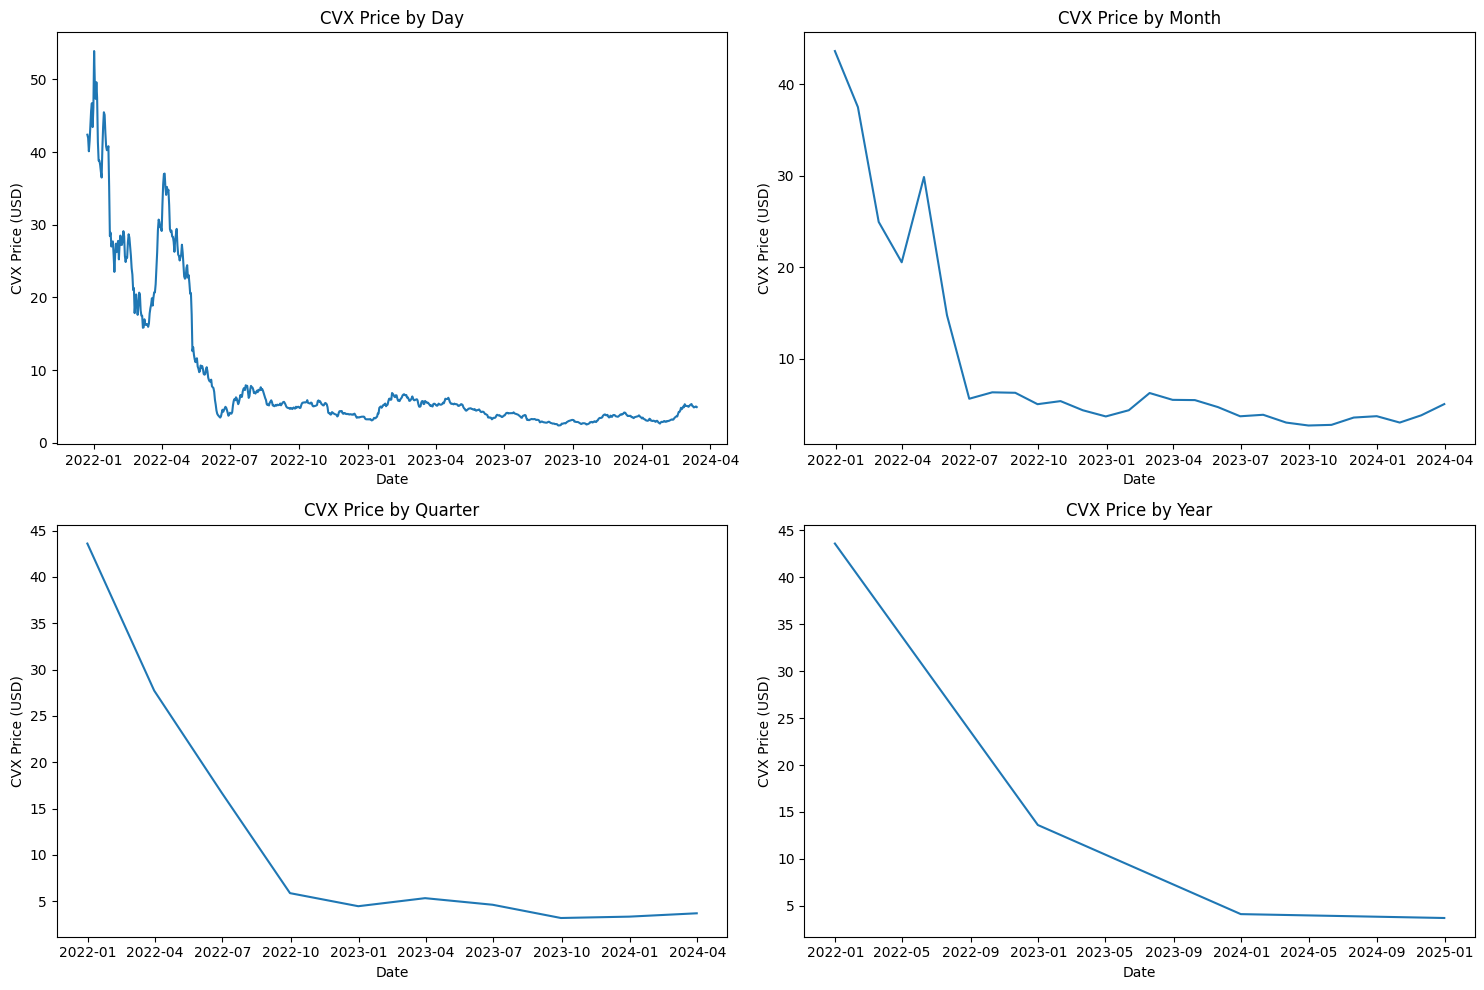

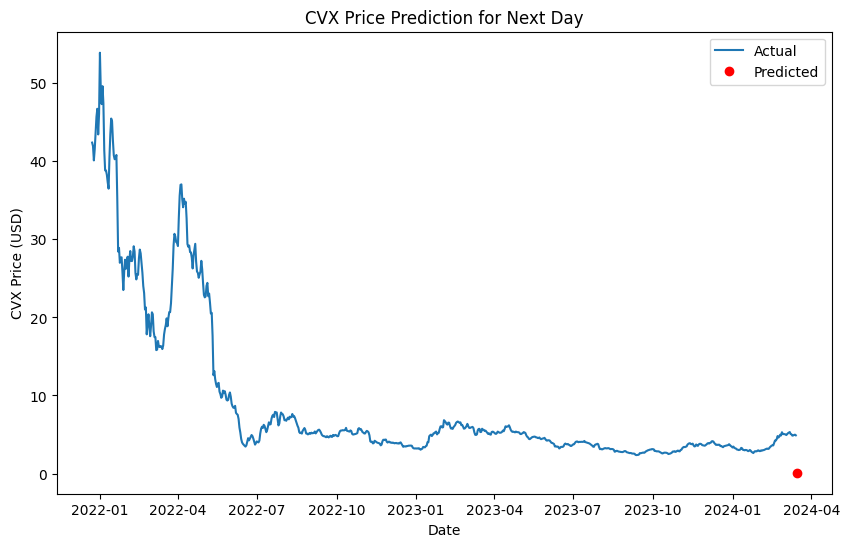

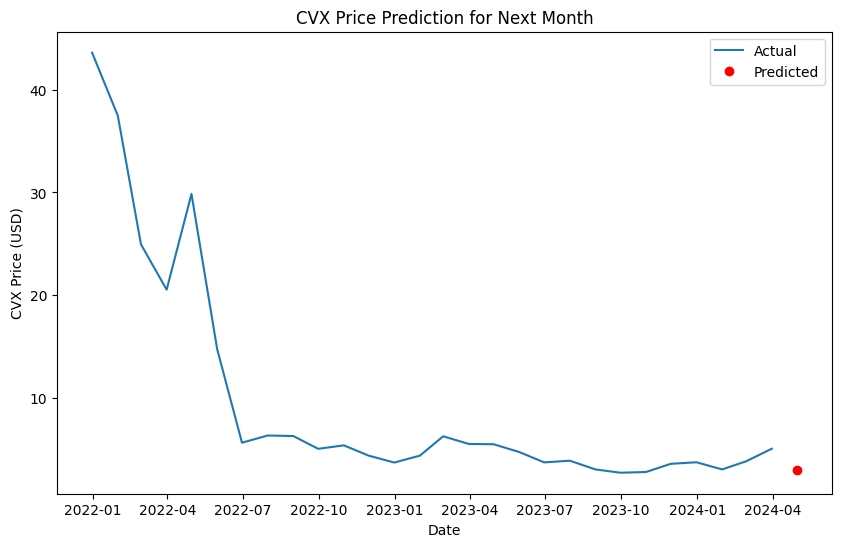

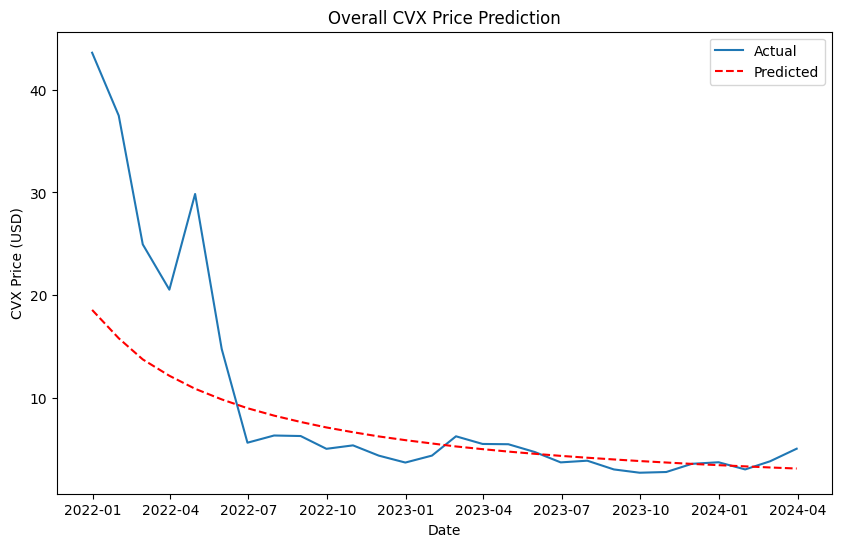

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.special import inv_boxcox
from sklearn.metrics import r2_score

# Load the data
df = pd.read_csv('../Dataset/cvx.csv')

# Convert timestamp to datetime and set it as index
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Resample to different frequencies
df_day = df.resample('D').mean()
df_month = df.resample('M').mean()
df_year = df.resample('A-DEC').mean()
df_quarter = df.resample('Q-DEC').mean()

# Plot separate graphs for day, month, year, and quarter
plt.figure(figsize=[15, 10])

# Plot by day
plt.subplot(2, 2, 1)
plt.plot(df_day.index, df_day['open'], '-')
plt.title('CVX Price by Day')
plt.xlabel('Date')
plt.ylabel('CVX Price (USD)')
plt.savefig('cvx_price_day.png')

# Plot by month
plt.subplot(2, 2, 2)
plt.plot(df_month.index, df_month['open'], '-')
plt.title('CVX Price by Month')
plt.xlabel('Date')
plt.ylabel('CVX Price (USD)')
plt.savefig('cvx_price_month.png')

# Plot by quarter
plt.subplot(2, 2, 3)
plt.plot(df_quarter.index, df_quarter['open'], '-')
plt.title('CVX Price by Quarter')
plt.xlabel('Date')
plt.ylabel('CVX Price (USD)')
plt.savefig('cvx_price_quarter.png')

# Plot by year
plt.subplot(2, 2, 4)
plt.plot(df_year.index, df_year['open'], '-')
plt.title('CVX Price by Year')
plt.xlabel('Date')
plt.ylabel('CVX Price (USD)')
plt.savefig('cvx_price_year.png')

plt.tight_layout()

# STL decomposition
decomposition = seasonal_decompose(df_month['open'], model='additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Apply Box-Cox Transformation
df_month['open_boxcox'], lmbda = stats.boxcox(df_month['open'].dropna())

# Split data into features (X) and target variable (y)
X_month = np.arange(len(df_month)).reshape(-1, 1)  # Using index as feature for month
y_month = df_month['open_boxcox'].values

# Split data into training and testing sets for month
X_train_month, X_test_month, y_train_month, y_test_month = train_test_split(X_month, y_month, test_size=0.2, random_state=42)

# Create and train linear regression model for month
model_month = LinearRegression()
model_month.fit(X_train_month, y_train_month)

# Make predictions for month
y_pred_month = model_month.predict(X_month)

# Inverse Box-Cox Transformation for month predictions
y_pred_month_inv = inv_boxcox(y_pred_month, lmbda)

# Calculate R-squared score for month
r2_month = r2_score(inv_boxcox(y_month, lmbda), y_pred_month_inv)

# Generate predictions for day
next_day_index = len(df_day) + 1
next_day_pred = model_month.predict([[next_day_index]])[0]
next_day_pred_inv = inv_boxcox(next_day_pred, lmbda)
next_day_prediction_result = f"The predicted price for tomorrow is {next_day_pred_inv:.2f} USD."

# Generate predictions for month
next_month_index = len(df_month) + 1
next_month_pred = model_month.predict([[next_month_index]])[0]
next_month_pred_inv = inv_boxcox(next_month_pred, lmbda)
next_month_prediction_result = f"The predicted price for next month is {next_month_pred_inv:.2f} USD."

# Plot day-based predicted prices
plt.figure(figsize=[10, 6])
plt.plot(df_day.index, df_day['open'], label='Actual')
plt.plot(df_day.index[-1] + pd.Timedelta(days=1), next_day_pred_inv, 'ro', label='Predicted')
plt.title('CVX Price Prediction for Next Day')
plt.xlabel('Date')
plt.ylabel('CVX Price (USD)')
plt.legend()
plt.savefig('predicted_price_day.png')

# Plot month-based predicted prices
plt.figure(figsize=[10, 6])
plt.plot(df_month.index, df_month['open'], label='Actual')
plt.plot(df_month.index[-1] + pd.DateOffset(months=1), next_month_pred_inv, 'ro', label='Predicted')
plt.title('CVX Price Prediction for Next Month')
plt.xlabel('Date')
plt.ylabel('CVX Price (USD)')
plt.legend()
plt.savefig('predicted_price_month.png')

# Plot overall predicted prices
plt.figure(figsize=[10, 6])
plt.plot(df_month.index, df_month['open'], label='Actual')
plt.plot(df_month.index, y_pred_month_inv, 'r--', label='Predicted')
plt.title('Overall CVX Price Prediction')
plt.xlabel('Date')
plt.ylabel('CVX Price (USD)')
plt.legend()
plt.savefig('overall_predicted_price.png')

# Generate HTML content
html_content = f"""
<!DOCTYPE html>
<html>
<head>
    <link href="https://cdn.jsdelivr.net/npm/bootstrap@5.3.3/dist/css/bootstrap.min.css" rel="stylesheet" integrity="sha384-QWTKZyjpPEjISv5WaRU9OFeRpok6YctnYmDr5pNlyT2bRjXh0JMhjY6hW+ALEwIH" crossorigin="anonymous">

    <title>CVX Price Analysis</title>
    <style>
      body {{
          
            font-family: Arial, sans-serif;
            margin: 0;
            padding: 0;
            box-sizing: border-box;
            background-color: #2a2a2a;
            color: white;

      }}

        .container {{
            
            display: flex;
            flex-wrap: wrap;
            justify-content: center;
            align-items: center;
            padding: 20px;
        }}

        .graph {{
            flex: 1 1 300px;
            margin: 10px;
            padding: 20px;
            border: 1px solid #ccc;
            box-shadow: 0 0 10px rgba(0, 0, 0, 0.1);
            text-align: center;
            background-color: #2a2a2a;
            background: linear-gradient(#2a2a2a, #d2cd5e);
            }}
        img {{
                
            max-width: 100%;
            height: auto;
            }}

        .prediction {{
            margin-top: 20px;
            text-align: center;
            }}
    </style>
</head>
<body>
    <h1 style="text-align: center;" class="mt-3">CVX Price Analysis</h1>
    <div class="px-4 mt-4">
            <h2>Predictions</h2>
        <p>{next_day_prediction_result}</p>
        <p>{next_month_prediction_result}</p>
        </div>
    <div class="container">
        <div class="graph">
            <h2>CVX Price by Day</h2>
            <img src="cvx_price_day.png" alt="CVX Price by Day">
        </div>
        <div class="graph">
            <h2>CVX Price by Month</h2>
            <img src="cvx_price_month.png" alt="CVX Price by Month">
        </div>
        <div class="graph">
            <h2>CVX Price by Quarter</h2>
            <img src="cvx_price_quarter.png" alt="CVX Price by Quarter">
        </div>
        <div class="graph">
            <h2>CVX Price by Year</h2>
            <img src="cvx_price_year.png" alt="CVX Price by Year">
        </div>
    </div>
    <div class="prediction">

        <h2>Day-Based Predicted Prices</h2>
        <img src="predicted_price_day.png" alt="Day-Based Predicted Prices">
        <h2>Month-Based Predicted Prices</h2>
        <img src="predicted_price_month.png" alt="Month-Based Predicted Prices">
        <h2>Overall Predicted Prices</h2>
        <img src="overall_predicted_price.png" alt="Overall Predicted Prices">
        <h2>Model Evaluation</h2>
        <p>R-squared score for month: {r2_month}</p>
    </div>
</body>
</html>
"""

with open("CVX_analysis.html", "w") as file:
    file.write(html_content)
